<a href="https://colab.research.google.com/github/matthewdheilmanvanderbilt/CS5262_MachineLearning/blob/feature-engineering-from-EDA/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
This project will be used to fulfill the first set of assignments for the Vanderbilt CS5265-50 (Foundations of Machine Learning) class.  The project consists of delivering a machine learning application.  The building of the project will be done over the course of seven (7) weeks. 

The purpose of the project is to:
1.   Setup the environment for the machine learning assignment
1.   Learn how to setup and use Google Colab
1.   Apply literate coding techniques in solving an analytical problem
1.   Learn to use pandas to solve a data exploration problem

The author of this project is Matt Heilman.  The professor is Dana Zheng.  The professor has asked the author to select a dataset will meet the following guidelines:
*   Tabular/structured/2D (i.e., rows and columns)
*   $\geq$ 5000 samples/records/rows, but no more than 50k rows
*   $\geq$ 7 features/variables/columns, but no more than 25 columns
*   Independence between data points (rows in your data)
*   Identify a dataset that you can use for a binary classification task directly or after transformation
*   Diverse data types for your columns:
*   Continuous variables (e.g., measurements such as weight, temperature, etc.)
*   Count variables (e.g., age, number of people in a classroom, etc.)
*   Categorical variables (e.g., gender, type of Operating Systems, degrees of severity, etc.)

## Introduction
Stoke is the leading cause of death in the United States (1).  It is the second largest cause of death worldwide (2).  Strokes are a major cause of serious disability for adults (1).  Every year, more than 795,000 people have strokes int he US (3).  Stokes related costs in the US were nearly \\$56.6 billion between 2018 and 2019 (3).   The US has the highest average cost per patient for stroke treatment of \\$59,900 (5).

The CDC estimates 80% of stokes are preventable (4).  High blood pressure is the single most important treatable factor (4).  Other factors include life-style changes and medicine (6). 

## Literature Review


1.   The CDC website was consulted for high level statistics on strokes.
2.   Publicly available journal articles from NIH were also used. 

All references/citations are listed in the References section (below).


## Research Gap
There are no gaps in the research of strokes, their causes, their prevention, and their costs.  There is a significant amount of peer reviewed journal articles available.   

## Challenges
The author of this project has no machine learning education or experience.  This project, and the author's knowledge of machine learning, will evolve over the next few weeks.  At this point, the author is too ignorant to know what research gaps exist and this section will be updated before the final deliverable.

# Project Description

## Project Topic (Problem Formulation)
This project will attempt to predict if a person has a risk of a stroke.  Strokes are preventable and the monetary cost to prevent a stroke pail in comparison to the treatment cost after a person suffers a stroke.  If all strokes could be eliminated in the US, there is a potential savings of $56 billion per year.

## Methodology

The following methodology will use used:
1.   Problem Definition - Define the problem to be solved.
1.   Data Exploration - Exploratory Data Analysis and an investigation of what data is available and when it's available.
1.   Feature Engineering - Take raw data and make alterations (combining, finding interactions, recasting it, etc.)
1.   Modeling - Create the actual model.
1.   Assessment - Determine if the model is worth the investment/cost.


The following data science process will be used:
1.   Collection
1.   Cleaning
1.   Exploratory Data Analysis
1.   Model Building
1.   Deployment

I have not seen the future assignments and I'm not sure if we will be working all the way through #5 Deployment. 


## Anticipated Outcome(s)
The author anticipates the model will reflect the research that as done by the CDC, specifically that high blood pressure will be the leading indicator of stroke risk.  

The author anticipates he will be able to develop a model that allows him to determine which risks have higher weightings for stoke risk.

## Questions to Answer in EDA
Question 1 - Can I use EDA to predict the features that will have the highest weight/score when the machine learning finds the best model?

Question 2 - How clean is the BMI?  BMI is notorious for being inaccurate because it relies on people to measure height and weight.  Issue arise when people use different units (i.e. cm and lbs.) and with people who can't measure well (wheelchairs, walkers, etc.).

Question 3 - How much garbage data is out there (i.e. missing columns, bad data, etc.)?  

Question 4 - Are there enough stroke victims to make a prediction?  The future lectures (or the professor) talked about balanced data.  This question may actually be: Do I have balanced data and if it, do I need to do something with it?  

Question 5 - What Panda methods (graphs/plots/functions) represent that data the best?

# Performance Metrics
I've attempted to read ahead (Week 4) to determine if I could determine performance metrics that I could use.  The lectures were a little too advanced for me (area under the curve, model scores, F0, RMSC, confusion matrix, regression metrics, etc.).

I found a page from neptune.ai that talked about metrics.  At this point it looks like I will be calculating True Positives, True Negatives, False Positives, and False Negatives. I. can use this information to form a confusion matrix, the precision, recall, and F1-score.  

There appears to be some way of calculating the value of the model.  Professor Spencer-Smith lectured that value is the best metric to use (not F0, AUC, RMSC).  For this exercise a positive ROI would be a good goal for this initial assignment.  

The value can be looked at from various stakeholders:


*   Payers: Payers and insurance companies will want to significantly reduce the number of strokes.  If they can identify members (patients) with stroke risks, they can educate and incentivize the member to reduce their stroke.
*   People (patients/members): Strokes can be fatal or debilitating.  People find value in staying healthy.  
*   Providers: Providers make money from strokes.  They may be less likely to find value in preventing strokes as it will affect their revenue in a negative way.



# Load Libraries
Load the standard libraries for loading data and performing the exploratory data analysis

In [198]:
#tables and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Data
Load the data using pandas and read it as a pandas dataframe

In [199]:
responses = pd.read_csv('https://raw.githubusercontent.com/matthewdheilmanvanderbilt/CS5262_MachineLearning/main/healthcare-dataset-stroke-data.csv')
display(responses.head()) # prints the heading of the dataframe and 5 rows
responses.info() # summary of the dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Exploratory Data Analysis
Performing some simple exploratory data analysis.

### Look for missing values

In [200]:
responses.isna().sum()  # Check how many missing values are in each column



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Examine Stroke


In [201]:
display(responses['stroke'].value_counts())
display(responses['stroke'].value_counts()[1] / responses['stroke'].value_counts()[0])

0    4861
1     249
Name: stroke, dtype: int64

0.051224027977782347

Only 5% of patients have had a stroke.  This data is not well balanced.  

### Examine Gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

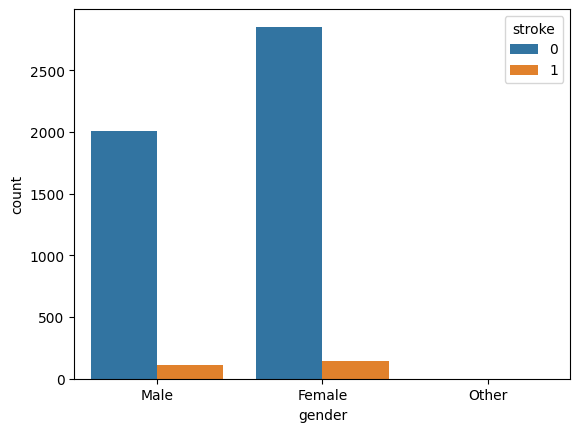

In [202]:
responses.gender.unique()

# Creating a pie chart to visualize proportions of the genders in this data
display(responses['gender'].value_counts())

#plt.pie(gender_counts, labels=gender_counts.index, shadow = True)
sns.countplot(data=responses, hue='stroke', x='gender', orient='h')


In [203]:
male_strokes =  (len(responses[(responses['gender'] == 'Male') & (responses['stroke'] == 1) ]))
all_males = (len(responses[(responses['gender'] == 'Male')]))
female_strokes =  (len(responses[(responses['gender'] == 'Female') & (responses['stroke'] == 1) ]))
all_females =  (len(responses[(responses['gender'] == 'Female')]))

display (male_strokes/all_males)
display (female_strokes/all_females)

0.05106382978723404

0.047094188376753505

The percentage of men and women who have strokes are 5%.

### Examine Age

In [204]:
age = responses.age.unique()
print(sorted(age))

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 1.0, 1.08, 1.16, 1.24, 1.32, 1.4, 1.48, 1.56, 1.64, 1.72, 1.8, 1.88, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0]


Ages below 2 years have fractional/decimal values.

In [205]:
#age_counts = responses['age'].value_counts()
#display(age_counts)

age_counts = responses[(responses['age'] < 1) | ( (responses['age'] > 1) & (responses['age'] < 2))]
non_int_age_count = age_counts['age'].value_counts()
display(non_int_age_count)
non_int_age_count.sum()


1.80    9
1.32    8
1.24    8
1.08    8
1.64    8
1.88    8
1.48    6
1.72    6
0.88    5
0.32    5
0.56    5
0.24    5
0.72    5
0.80    4
1.56    4
0.64    4
1.16    4
1.40    3
0.48    3
0.16    3
0.40    2
0.08    2
Name: age, dtype: int64

115

There are 115 values that have decimal values.  I propose to round them.  I will verify with the professor.

array([[<Axes: title={'center': 'age'}>]], dtype=object)

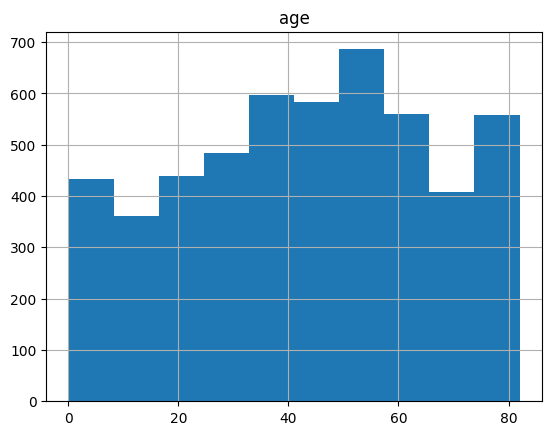

In [206]:
responses.hist(column=['age'])

There is pretty even distribution of ages in this data.

<Axes: xlabel='stroke', ylabel='age'>

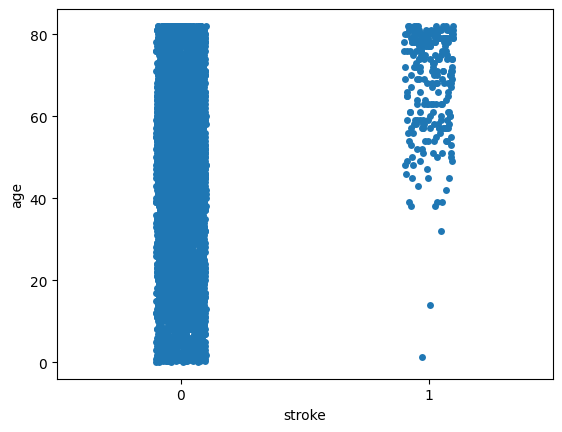

In [207]:
sns.stripplot(data=responses, x="stroke", y="age") #Do we see more stroke after a certain age?

<Axes: xlabel='stroke', ylabel='age'>

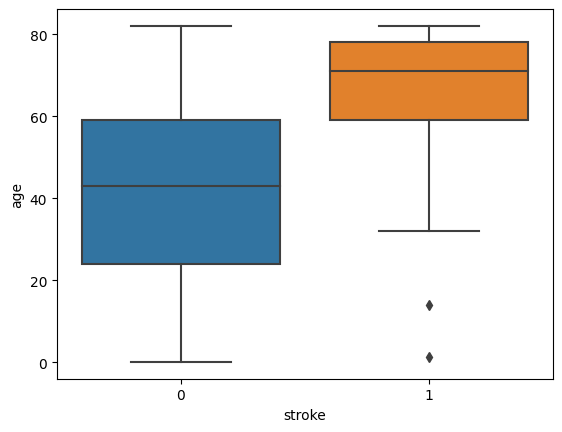

In [208]:
sns.boxplot(y='age', x='stroke', data=responses)

Older people appear to have a higher incidence of stroke.  The risk appears to start at 40 and become larger after 60.  There are 3 outliers (below 40).  I propose to drop these, but will verify with the professor.

### Examine Hypertension





In [209]:
responses['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

<Axes: xlabel='hypertension', ylabel='count'>

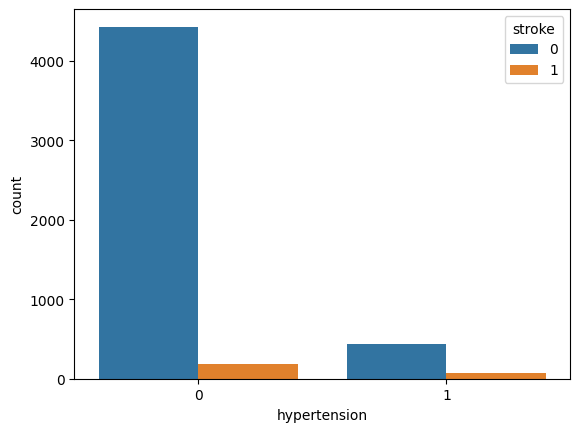

In [210]:
sns.countplot(data=responses, x='hypertension', hue='stroke')

In [211]:
strokes_by_hypertension_stroke = responses.groupby(['hypertension', 'stroke']).agg({'stroke': 'count'})
strokes_by_hypertension = responses.groupby(['hypertension']).agg({'stroke': 'count'})
display(strokes_by_hypertension_stroke)
display (strokes_by_hypertension_stroke.div(strokes_by_hypertension, level='hypertension')*100)

stroke
hypertension stroke        
0            0         4429
             1          183
1            0          432
             1           66

stroke
hypertension stroke           
0            0       96.032090
             1        3.967910
1            0       86.746988
             1       13.253012

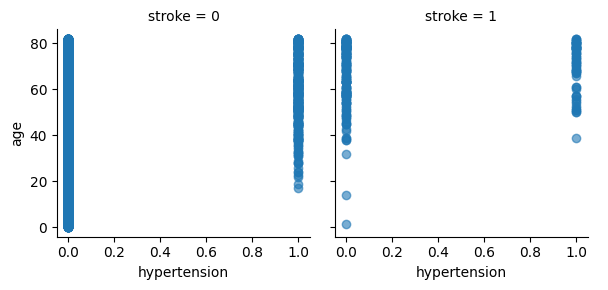

In [212]:
sns.FacetGrid(responses, col = "stroke").map(plt.scatter, "hypertension", "age", alpha =0.6).add_legend()

<Axes: xlabel='hypertension', ylabel='age'>

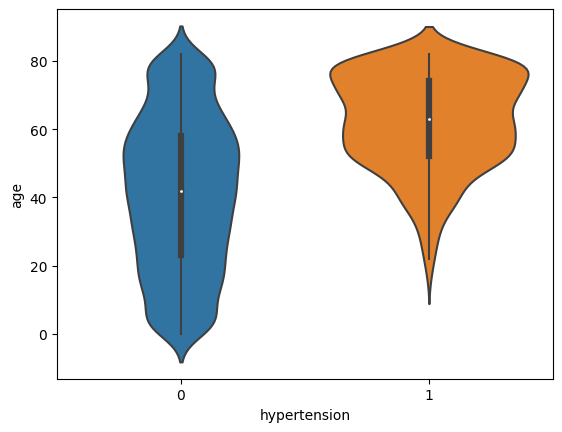

In [213]:
sns.violinplot(x="hypertension", y="age",   data=responses)

### Examine Heart Disease

In [214]:
responses['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

<Axes: xlabel='heart_disease', ylabel='count'>

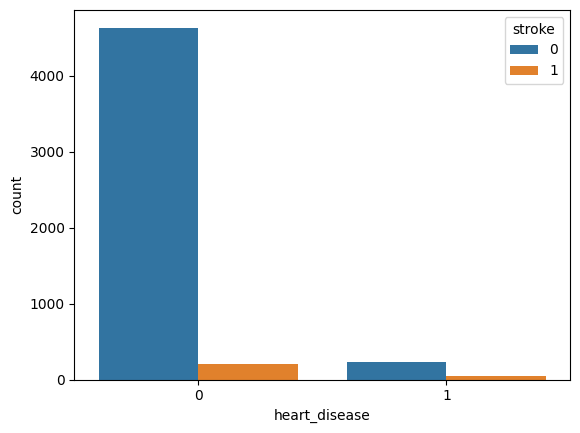

In [215]:
sns.countplot(data=responses, x='heart_disease', hue='stroke')

In [216]:
strokes_by_heart_disease_stroke = responses.groupby(['heart_disease', 'stroke']).agg({'stroke': 'count'})
strokes_by_heart_disease = responses.groupby(['heart_disease']).agg({'stroke': 'count'})
display(strokes_by_heart_disease_stroke)
display (strokes_by_heart_disease_stroke.div(strokes_by_heart_disease, level='heart_disease')*100)

stroke
heart_disease stroke        
0             0         4632
              1          202
1             0          229
              1           47

stroke
heart_disease stroke           
0             0       95.821266
              1        4.178734
1             0       82.971014
              1       17.028986

<Axes: xlabel='heart_disease', ylabel='age'>

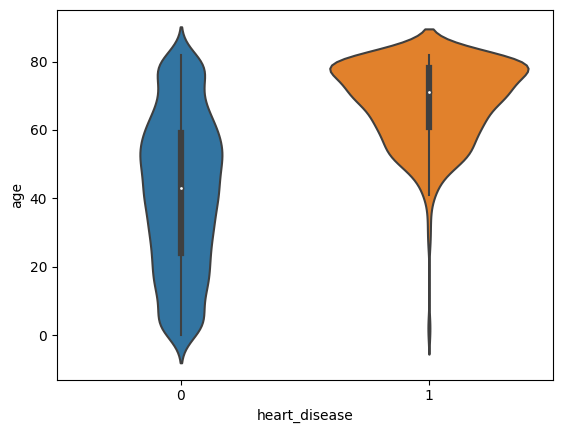

In [217]:
sns.violinplot(x="heart_disease", y="age",   data=responses)

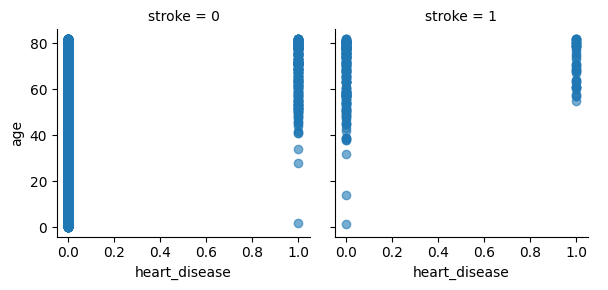

In [218]:
sns.FacetGrid(responses, col = "stroke").map(plt.scatter, "heart_disease", "age", alpha =0.6).add_legend()

### Examine Work Type

In [219]:
responses['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

These values appear to line up with the common workforce in America.  I am not sure if I should keep the never_worked feature because there is no such a small amount of data.

<Axes: xlabel='stroke', ylabel='work_type'>

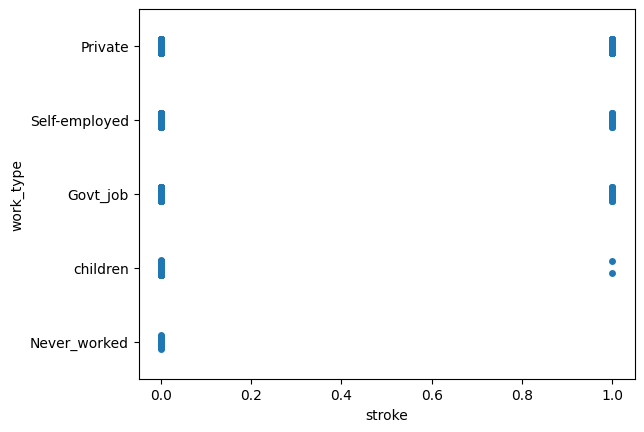

In [220]:
sns.stripplot(data=responses, x="stroke", y="work_type") 

<Axes: xlabel='work_type', ylabel='count'>

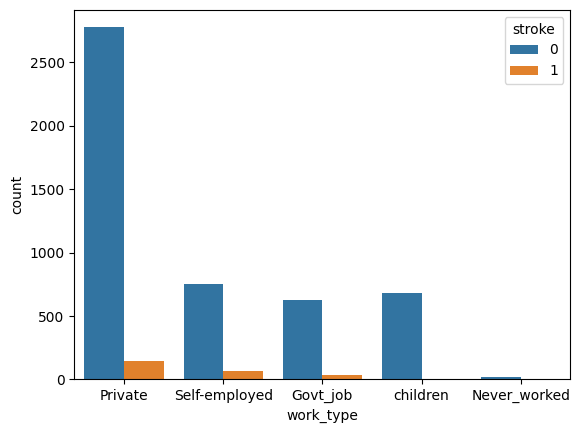

In [221]:
sns.countplot(data=responses, x='work_type', hue='stroke')

There appears to be a lower incidence of stroke amount individuals who raise children or have never worked.

In [222]:
strokes_by_work_type_stroke = responses.groupby(['work_type', 'stroke']).agg({'stroke': 'count'})
strokes_by_work_type = responses.groupby(['work_type']).agg({'stroke': 'count'})
display(strokes_by_work_type_stroke)
display (strokes_by_work_type_stroke.div(strokes_by_work_type, level='work_type')*100)

stroke
work_type     stroke        
Govt_job      0          624
              1           33
Never_worked  0           22
Private       0         2776
              1          149
Self-employed 0          754
              1           65
children      0          685
              1            2

stroke
work_type     stroke            
Govt_job      0        94.977169
              1         5.022831
Never_worked  0       100.000000
Private       0        94.905983
              1         5.094017
Self-employed 0        92.063492
              1         7.936508
children      0        99.708879
              1         0.291121

<Axes: xlabel='work_type', ylabel='age'>

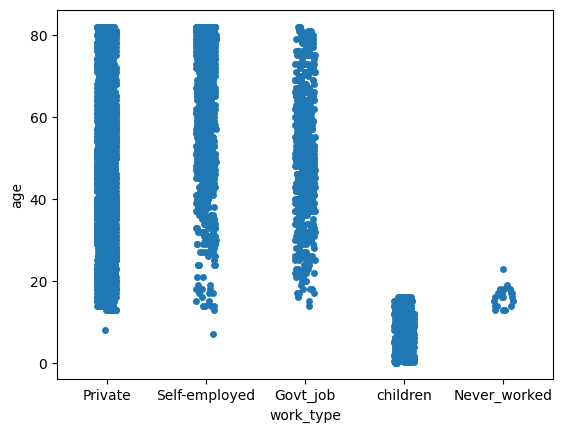

In [223]:
sns.stripplot(data=responses, x="work_type", y="age") #Do we see more stroke after a certain age?

The relationship between not having a stroke and either not having children or never worked appears to be a function of age, not work type.  People who don't work, or are raising children, are 20 or younger, which is a group already identified as not being at risk for a stroke.

### Examine BMI

array([[<Axes: title={'center': 'bmi'}>]], dtype=object)

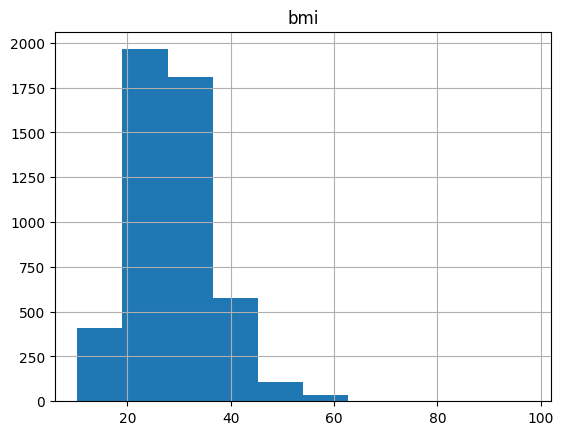

In [224]:
responses.hist(column=['bmi'])

<Axes: ylabel='bmi'>

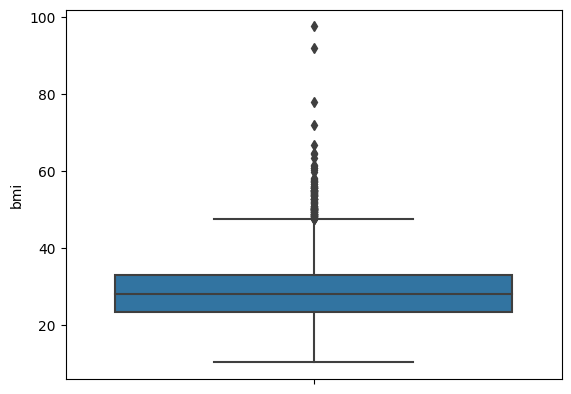

In [225]:
sns.boxplot(y='bmi', data=responses)

<Axes: xlabel='stroke', ylabel='bmi'>

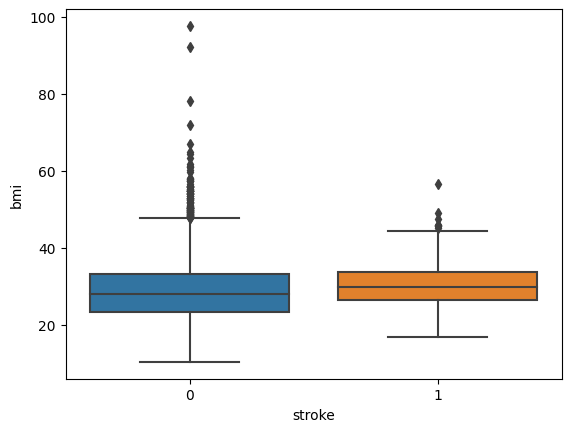

In [226]:
sns.boxplot(y='bmi', x='stroke', data=responses)

<Axes: xlabel='bmi', ylabel='Count'>

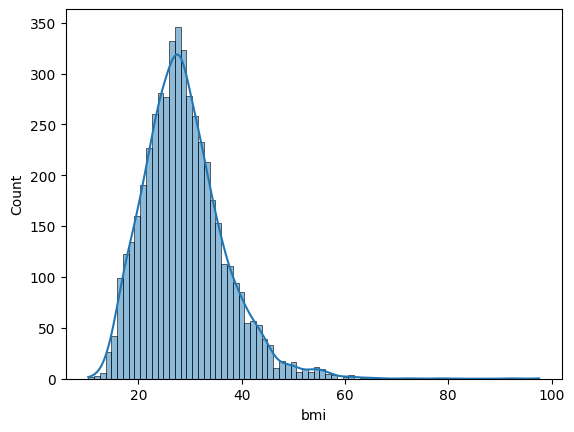

In [227]:
sns.histplot(responses, x='bmi', kde=True)

### Calculate the mean, standard deviation, 3sd's, and 2sd's.

In [228]:

bmi_mean = (responses['bmi'].mean())
bmi_stddev = ( responses['bmi'].std())
bmi_3_stddev =  (responses['bmi'].mean() + (responses['bmi'].std() * 3), responses['bmi'].mean() + (responses['bmi'].std() * -3))
bmi_2_stddev =  (responses['bmi'].mean() + (responses['bmi'].std() * 2), responses['bmi'].mean() + (responses['bmi'].std() * -2))
display (bmi_mean, bmi_stddev, bmi_3_stddev, bmi_2_stddev)

28.893236911794666

7.854066729680164

(52.455437100835155, 5.331036722754174)

(44.60137037115499, 13.185103452434339)

### Evaluate Residence Type

In [229]:
responses['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [230]:
responses.groupby(["Residence_type", "stroke"]).size()

Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
dtype: int64

<Axes: xlabel='Residence_type', ylabel='count'>

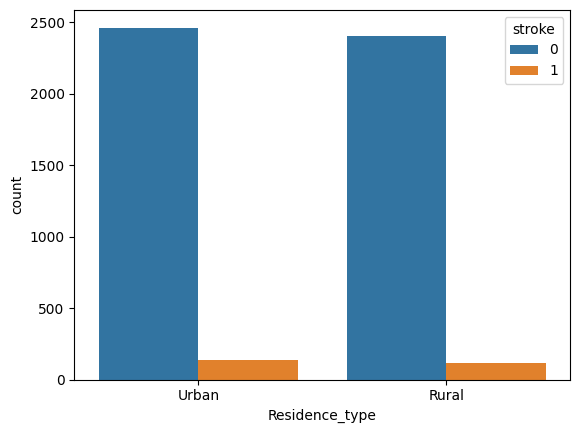

In [231]:
sns.countplot(data=responses, x='Residence_type', hue='stroke')

### Examine Average Blood Glucose Levels

array([[<Axes: title={'center': 'avg_glucose_level'}>]], dtype=object)

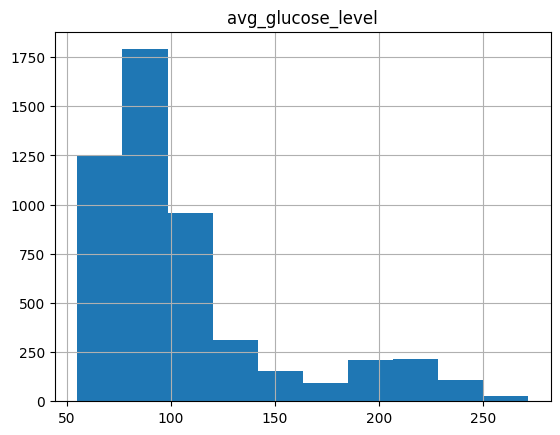

In [232]:
responses.hist(column=['avg_glucose_level'])

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

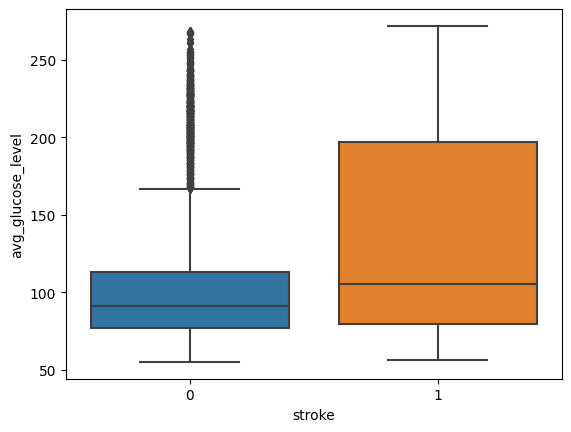

In [233]:
sns.boxplot(y='avg_glucose_level', x='stroke', data=responses)

### Examine Smoking Status

In [234]:
responses['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<Axes: xlabel='smoking_status', ylabel='count'>

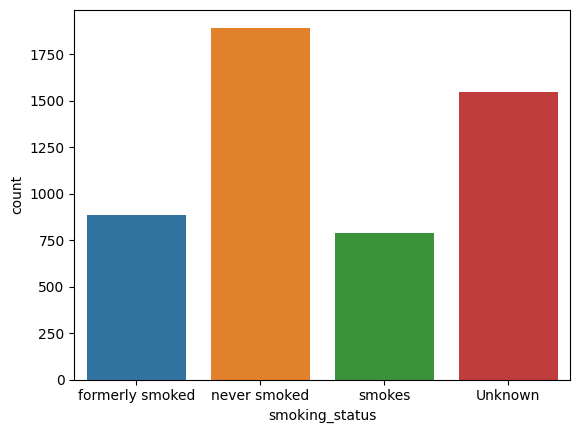

In [235]:
sns.countplot(data=responses, x='smoking_status')

In [236]:


strokes_by_smoking_status_stroke = responses.groupby(['smoking_status', 'stroke']).agg({'stroke': 'count'})
strokes_by_smoking_status = responses.groupby(['smoking_status']).agg({'stroke': 'count'})
display(strokes_by_smoking_status_stroke)
display (strokes_by_smoking_status_stroke.div(strokes_by_smoking_status, level='smoking_status')*100)



stroke
smoking_status  stroke        
Unknown         0         1497
                1           47
formerly smoked 0          815
                1           70
never smoked    0         1802
                1           90
smokes          0          747
                1           42

stroke
smoking_status  stroke           
Unknown         0       96.955959
                1        3.044041
formerly smoked 0       92.090395
                1        7.909605
never smoked    0       95.243129
                1        4.756871
smokes          0       94.676806
                1        5.323194

<Axes: xlabel='smoking_status', ylabel='count'>

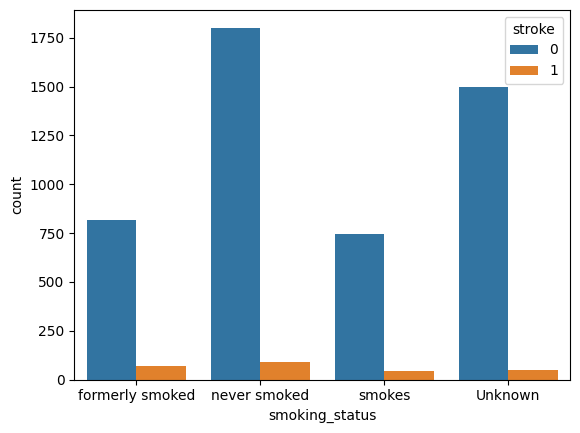

In [237]:
sns.countplot(data=responses, x='smoking_status', hue='stroke')

### Evaluate Ever Married


In [238]:
responses['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [239]:


strokes_by_ever_smoked_stroke = responses.groupby(['ever_married', 'stroke']).agg({'stroke': 'count'})
strokes_by_ever_smoked = responses.groupby(['ever_married']).agg({'stroke': 'count'})
display(strokes_by_ever_smoked_stroke)
display (strokes_by_ever_smoked_stroke.div(strokes_by_ever_smoked, level='ever_married')*100)

stroke
ever_married stroke        
No           0         1728
             1           29
Yes          0         3133
             1          220

stroke
ever_married stroke           
No           0       98.349459
             1        1.650541
Yes          0       93.438712
             1        6.561288

<Axes: xlabel='ever_married', ylabel='count'>

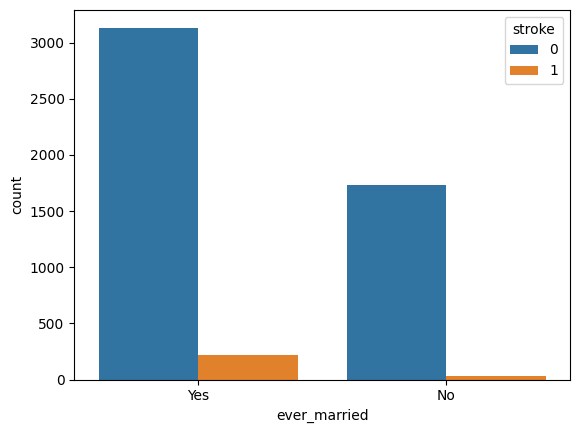

In [240]:
sns.countplot(data=responses, x='ever_married', hue='stroke')

<Axes: xlabel='ever_married', ylabel='age'>

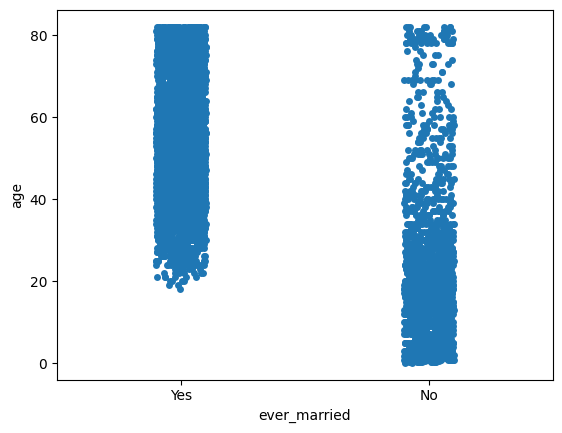

In [241]:
sns.stripplot(data=responses, x="ever_married", y="age") #Do we see more stroke after a certain age?

## EDA Findings & Answered Questions
### Question 1 - Can I use EDA to predict the features that will have the highest weight/score when the machine learning finds the best model?

Here are my guesses:


1. The patient's gender appears to have no bearing on the risk of stroke.  Both sexes have a 5% chance of having a stroke. 
1.  The patient's residence type appears to have no bearing on the risk of stroke.  
1.  The BMI seems to have no bearing on the risk of stroke.  The boxplot shows that the people with strokes are within the same Q1 to Q3 quartiles as those without stroke.  
1. Age appears to have a bearing on stroke risk.  Patients generally older than 40 have strokes.  There are 3 outliers of patients under 40 having strokes.  The boxplot shows patients between 60 & 80 generally have strokes.  It also shoes patients between 21 & 59 generally do not have strokes.
1. Hypertension seems to be an indicator for stroke.  4% of patients that do not have hypertension had a stroke.  13% of patients that have hypertension had a stroke.  Hypertension is more prevalent among older people, but there seems to be a higher group of people who had strokes that are older and have hypertension, compared to anyone else.  It looks like the combination of age and hypertension may be a factor when considering stroke.
1. Heart disease seems to be an indicator for stroke.  4% of patients that do not have heart disease had a stroke.  17% of patients that have heart disease  had a stroke.  Heart disease  is more prevalent among older people, but there seems to be a higher group of people who had strokes that are older and have heart disease , compared to anyone else.  It looks like the combination of age and heart disease  may be a factor when considering stroke.
1. Initially it appears that work_type of children and no work was associated with a low risk of stroke.  Upon further investigation, it became clear the ages of those people who aren't working, or raising children, was 20 or under.  This finding appears to be related to age and not work type.  If I remove those two values it appears that those working in government and private sector both have a 5% chance of having a stroke.  9% of self employed patients have had a stroke.  There appears to be a correlation between work type and the probability of having a stroke.  This could be stress related.
1. Patients with higher average blood glucose levels have a higher percentage of strokes. 
1.  Only 2% of patients that are not married have had a stroke. 7% of married patients had a stroke.  That's a 5% higher incidence of stroke.  The issue I see with this assumption is that married people are generally older individuals and unmarried people are generally younger.  I need help on this to determine how to determine if this is a meaningful datapoint. 


### Question 2 - How clean is the BMI?  BMI is notorious for being inaccurate because it relies on people to measure height and weight.  Issue arise when people use different units (i.e. cm and lbs.) and with people who can't measure well (wheelchairs, walkers, etc.).

*   The BMI has a of outliers.  I'm going to go with 2 standard deviations.  This brings the values to 13 to 47.
*   The BMI is missing from 210 patients.


### Question 3 - How much garbage data is out there (i.e. missing columns, bad data, etc.)?  Suggest ways to deal with it and validate with professor.
1. BMI has 201 missing values.  BMI is a problem besides the missing values.  There are values which really cannot be accurate.  
1. ever_smoked appears to be bad data.  The 'unknown' values are present in 30% of the records.   5% of patients who never smoked and who currently smoke have had a stroke.  That fact alone suggests smoking has no bearing on strokes.  It's interesting that 8% of patients that quit smoking had a stroke and 3% of patients that didn't answer the question never had a stroke.  This seems like garbage data to me.  Unknown should be somewhere between never smoked and currently smokes.  It also seems unlikely that those who quit smoking are worse off then those who currently smoke.
1. There is one 'Other' value in the gender feature.  The entire row/record will be removed.

### Question 4 - Are there enough stroke victims to make a prediction?  The future lectures (or the professor) talked about balanced data.  This question may actually be: Do I have balanced data and if it, do I need to do something with it?  

The data does not appear to be balanced.  Only 5% of the patients have had a stroke (249 strokes / 4861 non-strokes).  I will stratify the dataframe when I split the train/test data.

### Question 5 - What Panda methods (graphs/plots/functions) represent that data the best?

I've only researched a subset of the pandas, seaborn, and matplotlib, but I've already found a few trends.
1. For hard counts, I use pandas: info and value_counts.  I want to see the actual numbers.  The pie charts and bar graphs are don't show the detail I need.  It's hard to tell that 5% of both genders had a stroke.  Looking at the graphs, it almost looks like females had more strokes.
2. For categorical variables, I found using the countplot, with a hue of stroke, really helped to show high level relationships between the feature in question and the incident of stroke.  Having this picture is a great visualization and helps identify trends.  It seemed that I always had to follow up with the textual computation of the data.  I feel both methods are necessary to get a clear picture.  as
3. For continuous variables, I found using a histogram showed me how evenly the data was spaced out.   I also found the combination of the stripplot (scatter plot) and the boxplot effective at looking at the data.  I think the boxplot would have worked fine, except for I was not as familiar with the boxplot.  The scatter plot helped me understand the boxplot more.  
4. I also found the groupby method extremely effective in finding the percentages of values for categorical variables.
5. I found the violin plot interesting to look at hypertension.  Hypertension was observed across all ages.  I wanted to see if hypertension existed more in the upper age groups and this plot was able to show me that.

# Feature Engineering
Based on my EDA, I plan to perform the following feature engineering:


In [242]:
# For testing only: responses = pd.read_csv('https://raw.githubusercontent.com/matthewdheilmanvanderbilt/CS5262_MachineLearning/main/healthcare-dataset-stroke-data.csv')

display(responses.shape)

(5110, 12)

## The ID is not needed.  It is a unique identifier that overspecifies the data.  It should be removed.

In [243]:
responses = responses.drop(columns=['id'])

## Remove the Other gender - there is only one

In [244]:
## Drop the 'other' gender
responses.drop(responses[responses['gender'] == 'Other'].index, inplace = True)

## Drop the records with a null/nan BMI

In [245]:
responses = responses.dropna(subset=['bmi'])

## Categorize BMI to make it more conducive to machine learning (using CDC values)
*  less than 18.5 = underweight
*  18.5 to < 25 = healthy
*  25.0 to < 30 = overweight
*  30 or higher = obese


In [246]:
bmi_bins = [-np.inf,18.5, 25, 30, np.inf]
bmi_labels = ["underweight","healthy","overweight","obese"]
responses['bmi_cat'] = pd.cut(responses['bmi'], bins=bmi_bins, labels=bmi_labels)

## Drop bmi values (replaced with categories)
responses = responses.drop(columns=['bmi'])

## Categorize blood glucose levels to make it more conducive to machine learning (using CDC values)
* less than or equal to 99 mg/dl = normal
* 100 to <= 125 = prediabetes
* 126 or higher = diabetes


In [247]:
abl_bins = [-np.inf,100, 126, np.inf]
abl_labels = ["normal","prediabetes","diabetes"]
responses['avg_glucose_level_cat'] = pd.cut(responses['avg_glucose_level'], bins=abl_bins, labels=abl_labels)

## Drop average blood level values (replaced with categories)
responses = responses.drop(columns=['avg_glucose_level'])

In [248]:
## Convert age to integer, rounding the ages below 2 which have decimal values

In [249]:
responses['age'] = responses['age'].astype(int)

In [250]:
display(responses.head())
display(responses.shape)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,bmi_cat,avg_glucose_level_cat
0,Male,67,0,1,Yes,Private,Urban,formerly smoked,1,obese,diabetes
2,Male,80,0,1,Yes,Private,Rural,never smoked,1,obese,prediabetes
3,Female,49,0,0,Yes,Private,Urban,smokes,1,obese,diabetes
4,Female,79,1,0,Yes,Self-employed,Rural,never smoked,1,healthy,diabetes
5,Male,81,0,0,Yes,Private,Urban,formerly smoked,1,overweight,diabetes


(4908, 11)

# Test / Train Split
* I'm going to split my data 75% train and 25% split.  The dataset is small so I'm staying on the lower side of the 25% - 35% train recommendation.
* There will be no golden holdout.  I don't have any raw data that I can feed into this later to validate the model.

In [251]:
X_train, X_test, y_train, y_test = train_test_split(responses.drop(columns='stroke'),responses['stroke'], test_size=0.25, random_state=2435, stratify=responses['stroke'])

In [252]:
display('X train dimensions: ', X_train.shape)
display('X test dimensions: ', X_test.shape)
display(X_train.head)
X_train.info()
display(X_test.head)
X_test.info()
display('y train dimensions: ', y_train.shape)
display('y test dimensions: ', y_test.shape)
display(y_train.head)
y_train.info()
display(y_test.head)
y_test.info()

'X train dimensions: '

(3681, 10)

'X test dimensions: '

(1227, 10)

<bound method NDFrame.head of       gender  age  hypertension  heart_disease ever_married      work_type  \
2617    Male   53             0              0          Yes        Private   
2571    Male   49             0              0          Yes        Private   
4486    Male   14             0              0           No        Private   
4055    Male   68             0              1          Yes        Private   
4304  Female   61             0              0          Yes  Self-employed   
...      ...  ...           ...            ...          ...            ...   
4924    Male   40             1              0          Yes  Self-employed   
1565    Male    8             0              0           No       children   
2198    Male   45             1              0          Yes  Self-employed   
955     Male   31             0              0          Yes        Private   
69    Female   80             1              0          Yes  Self-employed   

     Residence_type   smoking_sta

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 2617 to 69
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 3681 non-null   object  
 1   age                    3681 non-null   int64   
 2   hypertension           3681 non-null   int64   
 3   heart_disease          3681 non-null   int64   
 4   ever_married           3681 non-null   object  
 5   work_type              3681 non-null   object  
 6   Residence_type         3681 non-null   object  
 7   smoking_status         3681 non-null   object  
 8   bmi_cat                3681 non-null   category
 9   avg_glucose_level_cat  3681 non-null   category
dtypes: category(2), int64(3), object(5)
memory usage: 266.3+ KB


<bound method NDFrame.head of       gender  age  hypertension  heart_disease ever_married      work_type  \
1143    Male   10             0              0           No       children   
3013  Female   45             0              0          Yes  Self-employed   
1211  Female   79             0              0          Yes        Private   
3175  Female    3             0              0           No       children   
980   Female    9             0              0           No       children   
...      ...  ...           ...            ...          ...            ...   
4335    Male   37             0              0          Yes        Private   
1108    Male   33             0              0          Yes       Govt_job   
202   Female   77             0              0          Yes  Self-employed   
3195  Female   57             1              0          Yes        Private   
1688  Female   32             0              0          Yes        Private   

     Residence_type   smoking_sta

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 1143 to 1688
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 1227 non-null   object  
 1   age                    1227 non-null   int64   
 2   hypertension           1227 non-null   int64   
 3   heart_disease          1227 non-null   int64   
 4   ever_married           1227 non-null   object  
 5   work_type              1227 non-null   object  
 6   Residence_type         1227 non-null   object  
 7   smoking_status         1227 non-null   object  
 8   bmi_cat                1227 non-null   category
 9   avg_glucose_level_cat  1227 non-null   category
dtypes: category(2), int64(3), object(5)
memory usage: 89.0+ KB


'y train dimensions: '

(3681,)

'y test dimensions: '

(1227,)

<bound method NDFrame.head of 2617    0
2571    0
4486    0
4055    0
4304    0
       ..
4924    0
1565    0
2198    0
955     0
69      1
Name: stroke, Length: 3681, dtype: int64>

<class 'pandas.core.series.Series'>
Int64Index: 3681 entries, 2617 to 69
Series name: stroke
Non-Null Count  Dtype
--------------  -----
3681 non-null   int64
dtypes: int64(1)
memory usage: 57.5 KB


<bound method NDFrame.head of 1143    0
3013    0
1211    0
3175    0
980     0
       ..
4335    0
1108    0
202     1
3195    0
1688    0
Name: stroke, Length: 1227, dtype: int64>

<class 'pandas.core.series.Series'>
Int64Index: 1227 entries, 1143 to 1688
Series name: stroke
Non-Null Count  Dtype
--------------  -----
1227 non-null   int64
dtypes: int64(1)
memory usage: 19.2 KB


# Pipeline
1.  I have no values to impute.  I've removed all missing values.
1.  I'll need two different pipelines (categorical & numeric). 
*  I will use a onehot processor for my categorical variables/pipeline (hypertension, heart_disease	ever_married, work_type, Residence_type, smoking_status, stroke, bmi_cat, avg_glucose_level_cat)   
*  I will use a standard scaler for my numerical variable/pipeline (age).
3. The last step of the pipeline will be to create a model.  This will change from a processing pipeline to a model pipeline.  I'll use the method of Logistic Regression so I can do model fitting.  


In [253]:

# individual pipelines for categorical variables and count variables
cat_pipeline = Pipeline(steps=['onehot_cat', preprocessing.OneHotEncoder(drop='if_binary')])
num_pipeline = Pipeline(steps=['scale_num', preprocessing.StandardScaler()])

#establish preprocessing on the data
preproc = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                            remainder='passthrough')



#generate the whole modeling pipeline with preprossing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet',solver='saga',tol=0.01))])

# visualization for the steps
with config_context(display='diagram'):
  display(pipe)



Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=['onehot_cat',
                                                                  OneHotEncoder(drop='if_binary')]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1c82723160>),
                                                 ('num_pipe',
                                                  Pipeline(steps=['scale_num',
                                                                  StandardScaler()]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1c827219c0>)])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

# Model Fit & Evaluation
  
*  I think age, hypertension, and heart disease will be the features the are most important.  BMI may have some factor, I'm curious to see. 
*  My hope is to have a model score of 80% or higher. 
*  Because the last step of my pipeline was to make it a model pipeline, I can use fit methods.  I plan to check it with
fit(X[,y]).  This will iterate through and provide the appropriate methods for fitting.  
*  I'll define a tuning grid.  It will create equally spaced parameters to explore.  A cross validation grid search will be setup.  
*  I will only use my train data when fitting the model.
*  I will only use my train data when exploring and tuning the hyperparameters.



# References


1.   https://www.cdc.gov/stroke/index.htm
1.   https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death
1.   https://www.cdc.gov/stroke/facts.htm
1.   https://www.cdc.gov/vitalsigns/stroke/
1.   Strilciuc S, Grad DA, Radu C, Chira D, Stan A, Ungureanu M, Gheorghe A, Muresanu FD. The economic burden of stroke: a systematic review of cost of illness studies. J Med Life. 2021 Sep-Oct;14(5):606-619. doi: 10.25122/jml-2021-0361. PMID: 35027963; PMCID: PMC8742896.
1.   https://www.cdc.gov/stroke/prevention.htm


